## Assignment 3

### 1. Implementation of the EM-Algorithm

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt(open("2d-em.csv", "rb"), delimiter=",", skiprows=1)

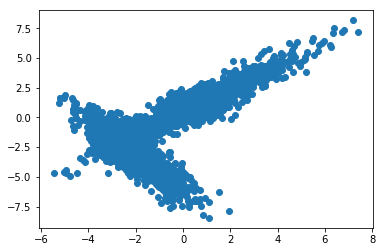

In [4]:
plt.scatter(data[:,0], data[:,1])
plt.show()

In [5]:
"""
    n: number of datapoints
    K: number of clusters
    r_ic: probability of datapoint x_i belongs to gaussian c
    r: nxK array of r_ic values
"""

'\n    n: number of datapoints\n    K: number of clusters\n    r_ic: probability of datapoint x_i belongs to gaussian c\n    r: nxK array of r_ic values\n'

In [ ]:
class EM():
    def __init__(self, X, number_of_clusters,iterations):
        self.X = X
        self.number_of_clusters = number_of_clusters
        self.iterations = iterations
#         self.mu = None
#         self.pi = None
#         self.cov = None
#         self.XY = None

In [6]:
K = 2
r = np.zeros((len(data), K))

In [7]:
def multivar_gauss(x, mu, sigma):
    return 1 / ( ((2*np.pi)**(len(mu)/2)) * (np.linalg.det(sigma)**(1/2)) ) * np.exp((-1/2) * ((x-mu).T.dot(np.linalg.inv(sigma))).dot((x-mu)))

In [8]:
mu = [[2,2], [-2,-2]]
sigma = [[[1,0],[0,1]], [[1,0],[0,1]]]
pi = [0.5, 0.5]

In [9]:
for c in range(K):
    r[:,c] = [pi[c]*multivar_gauss(x, mu[c], sigma[c]) for x in data]

In [10]:
# normalization
for i in range(len(r)):
    r[i] = r[i]/(np.sum(pi)*np.sum(r,axis=1)[i]) 
print(r)

[[1.00000000e+00 3.83095950e-14]
 [9.99999998e-01 2.06871143e-09]
 [9.99719769e-01 2.80230858e-04]
 ...
 [5.73891046e-07 9.99999426e-01]
 [1.11716775e-05 9.99988828e-01]
 [7.91017841e-08 9.99999921e-01]]


In [56]:
def predictCluster(r):
    return r.argmax(axis=1)

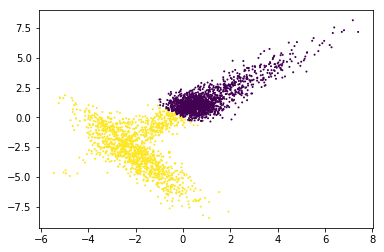

In [57]:
"""Plot the data"""

plt.scatter(data[:,0], data[:,1], c=predictCluster(r), s=1)
plt.show()

M-step

In [66]:
mu = []
cov = []
pi = []
for c in range(K):
    m_c = np.sum(r[:,c],axis=0)
    mu_c = (1/m_c)*np.sum(data*r[:,c].reshape(len(data),1),axis=0)
    mu.append(mu_c)
    cov.append(((1/m_c)*np.dot((np.array(r[:,c]).reshape(len(data),1)*(data-mu_c)).T,(data-mu_c))))
    pi.append(m_c/np.sum(r))